# INFO 2950 Homework 3

So far, we've been looking within one variable at a time: population, avocado price, etc. In this homework, we're going to start looking at ways of quantifying the relationship *between* two variables.

**No problem in this homework will involve `for` loops. Use only methods that operate on pandas DataFrames or Series.** (Series are one-dimensional arrays and often how DataFrame columns are represented when extracted.) These custom methods are written to operate efficiently on pandas objects, and are generally more computationally efficient than `for` loops.

## Part 1: Discussion exercises

### Python Functions

A Python function is a set of pre-defined code which is programmed for a certain purpose. To decrease code repetition (especially copy and pasting, which can introduce unwanted bugs), we write functions to perform repeated tasks. You can input data and other arguments (usually called "parameters") into a function. A function will perform its internal code and can (optionally) output objects using a `return` statement. A function will only execute when it's explicitly called. Indents in the function definiton are essential.

Here is an example of a simple function that prints the variable passed in the first (and only) parameter (called `print_content` locally, within the function definition).

In [2]:
def print_sth(print_content):
    '''
    param print_content: a string parameter. This is what you want to print
    '''
    print(print_content)
    
print_sth("Homework 3")    

Homework 3


While this function prints a statement, it doesn't actually return anything:

In [3]:
print("type returned: " + str(type(print_sth("test"))))

test
type returned: <class 'NoneType'>


The comment (between the `'''` symbols) in the function defintion tells the user what the parameter `print_content` should be. This syntax can automatically generate documentation for your own functions. It is very important to document any code you bother spending time to convert to a function, because you may want to use it again or share your code with others. It's helpful to write notes about how the function can be used and what it does.

Here is another function: this one takes *two* arguments and actually returns an object, all of which is documented in the comment at the top of the function definition. 

In [4]:
def course(dept,classcode):
    '''
    param dept: a string. It's the department code. 
    param classcode: an integer. It's the course number
    return: a string value which combines both department code and course number
    '''
    return dept+str(classcode)

output = course("INFO",2950)
print(output)
print("type returned: " + str(type(output)))

INFO2950
type returned: <class 'str'>


### String formatting

We often want to construct and print strings that include the values of calculated variables; it's good practice to add context to any values you print in your notebooks, so others reading them know what the number you're printing is. For instance, it's clearer to print `mean price: $27.80` instead of just `27.8`.
    
You can concatenate strings with the `+` operator, but you can't merge a string and a number without doing some type conversion (like we did above with `str(type(output))`). Sometimes there are multiple ways to display a variable, such as a float with either 2 or 3 decimal places. All strings have a function `.format()` that allows you to construct strings with placeholders where variables get inserted and to specify how the variables should appear.

We start by creating a string *template* (as a string). We insert placeholders `{}` into the string template where we want variable values to appear. Then for each of these placeholds, we include corresponding variable as an argument to `.format()` (in the desired order of appearance in the string template). For each of these values, Python will convert the value to a string and insert it in the corresponding placeholder. You can also specify how you want a value to appear. To format a value as a 4-digit decimal integer with leading zeros, use `{:04d}`. To round a float to two decimal places, use `{:.2f}`. See [the documentation](https://docs.python.org/3.8/library/string.html#formatspec) for other options.

Python also supports an older string format style using the `%` operator, which we prefer you do *not* use. There is also a newer method called f-strings that you may use. You may be familiar with `.format()` in the context of `print()` statements, but it's really a function of strings, not printing strings.

In [5]:
"this is my {} string".format("favorite")

'this is my favorite string'

In [6]:
"The letter {} has Unicode codepoint {:d} (as an integer), which is {:x} in hexadecimal and {:08b} in binary".format("M", ord("M"), ord("M"), ord("M"))

'The letter M has Unicode codepoint 77 (as an integer), which is 4d in hexadecimal and 01001101 in binary'

### Correlation and Causation

We often want to measure the relationship between two variables because we want to know whether the value of one factor *causes* another factor to have a certain value. Usually this is interesting because there may be one factor we care about but cannot directly control, and another factor that we can control, but we don't necessarily care about in and of itself. For example, I don't care about the number on my thermostat for itself, I care about it because it has a causal effect on the temperature in the house.

**1. Describe a situation where one factor, which we can observe and control, influences the value of another factor. Without using specific quantitative measurements, describe how strong you consider this relationship to be.**

**2. Describe a situation where one factor does not *influence* another factor, but nevertheless allows you to *predict* the value of that second factor. What would you need to do to distinguish between this situation and the previous situation?**

Correlation does not necessarily imply causation. Most of the statistical methods we will study can only show correlation, though there exist careful experimental designs that can enable [causal inference](https://en.wikipedia.org/wiki/Causal_inference). 

### Beyond Correlation/Causation

You may be familiar with the previous discussion. In fact, mean, variance, and "correlation is not causation" is about the only thing that we can reliably assume that everyone learns in a statistics class. But there's another problem that we face, which can be subtler and more dangerous.

Consider a system that predicts creditworthiness. The rows in the data table will correspond to people, and it is extremely easy to think of what you are doing as classifying *people* as creditworthy or not. But, as Princeton sociologist Ruha Benjamin [has pointed out](https://www.goodreads.com/en/book/show/42527493-race-after-technology), almost all of the actual variables are describing a person's *situation*. Sometimes situations can change quickly, as we all saw repeatedly over the last year, and sometimes they can be nearly impossible to escape. 

**3. The dataset we will look at in this homework is about the educational achievements of kindergarterners. It includes demographic information, as you can see from the data description file (**`Data description ECLS_R7.pdf`**). What do you think that you should be able to say about these children based on these measurements, and what can you not say?**


---

## Problem 1 (9 pts)

Write down your thoughts about the three discussion questions. Ensure your answer is moderately detailed to get full marks.

---

1. The socioeconomic status you are born into affects the socioeconomic status you achieve in adulthood. This would be a strong positive correlation that likely levels off at a certain income level. On top of correlation, this is a casual relationship because household income affects a child's education, resources, etc... that affects their opportunities in life.

2. Ice cream sales and crime rates. They can predict each other because they both increase in the summer causing higher temperatures and people to be out and active. This differs from the previous situation because there is a third, confounding, factor causing the increase in both factors. Therefore, there is correlation, but not causation.

3. You can discuss the relationship between a students attendance with their assignment completion. It's hard to exactly say something is a casual relationship, but we can probably make a strong argument for this. You can't say that a specific parameter are causing a high or low acheivement, you can't discuss a student's gender with their math performance. These are factors that are probably affected by confounding factors.

## Part 2: Correlation and Covariance
We will investigate data collected as part of the Early Childhood Longitudinal Studies program, which seeks to understand childhood development from birth through elementary school in the United States. The main dataset we will work with quantifies [the development of kindergarteners in 2010-2011](https://nces.ed.gov/ecls/kindergarten2011.asp) and is provided as `ECLS_R7.csv`. You may find it helpful to refer to the data description file (also sometimes referred to as a "codebook"), `Data description ECLS_R7.pdf`, which defines the variables in the data. While there is a lot of of information in this file, we will only explore a few variables in this homework.

In [7]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## load data
education_data = pd.read_csv("ECLS_R7.csv")

---

## Problem 2 (4 pts)
What does the variable `X7RTHETK4` measure? Calculate and print the mean and median of this variable. (make sure to use .format() to round all printed floats to two decimal places)

**Hint:** We will use the columns `X7MTHETK4`, `X7STHETK4`,  `X7RTHETK4`,`PARENTINV` throughout this homework. You may find it helpful to rename these columns now (e.g. using the [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) dataframe method).

---

Your answer: 

X7RTHETK4 measures Reading IRT Theta Score.

In [8]:
#Your code:


education_data.rename(columns = {'X7RTHETK4' : 'Reading_Score', 'X7MTHETK4' : 'Math_Score', 'X7STHETK4' : 'Science_Score', 'PARENTINV' : 'Parent_Attending'}, inplace = True)

reading_mean = np.around(education_data.Reading_Score.mean(),2)
reading_median = np.around(education_data.Reading_Score.median(),2)
print('Reading Mean: ', reading_mean)
print('Reading Median: ', reading_median)
education_data.head()

Reading Mean:  2.69
Reading Median:  2.71


,CHILDID,S7_ID,X_CHSEX_R,X7AGE,X7GRDLVL,X7PUBPRI,X_RACETH_R,CBEHAVE_POS,CBEHAVE_NEG,PEERVIC_T,...,X7TCHPER,X7TCHEXT,X7TCHINT,X7ATTMCQ,X7INTMCQ,X7BMI,Parent_Attending,EXTRACUR,PARENTDEP,P7HEALTH
0,10000001,1861,1,115.07,1,1,1,3.0,4.375,1.75,...,3.2,2.3333,1.75,1.1667,3.0000,16.5849,4,1,1.083333,1
1,10000007,3719,2,104.68,1,1,1,3.6,2.750,1.50,...,3.0,2.1667,1.25,3.0000,3.7143,14.3809,2,2,1.250000,1
2,10000014,1433,1,106.85,1,1,1,4.0,1.375,1.00,...,3.4,1.3333,1.00,4.8333,4.0000,17.5486,5,1,1.333333,2
3,10000020,1365,2,111.12,1,1,5,4.8,1.125,1.00,...,3.6,1.0000,1.00,4.8333,4.8571,22.5690,3,0,1.416667,2
4,10000021,3406,2,114.81,1,1,1,4.2,1.250,1.75,...,2.8,2.3333,1.75,4.6667,4.4286,15.5279,3,2,1.000000,1


---

## Problem 3 (4 pts)

Calculate and print the 1st quartile and the 95th precentile of the math score (original column name: `X7MTHETK4`) using the [.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) Series method. How are quartiles and percentiles related?


**Hint:** What are ["quantiles", "quartiles", and "percentiles"](https://www.statsdirect.com/help/nonparametric_methods/quantiles.htm#:~:text=Quantiles%20are%20points%20in%20a,of%20values%20in%20that%20distribution.&text=Centiles%2Fpercentiles%20are%20descriptions%20of,sorted%20values%20of%20a%20sample)?

---

Quartiles are points in a distribution related to the ranking of values in that distribution (0, .25,.5,.75, 100) and percentiles are each of the percentage points between those.

In [9]:
# Your code:
print(education_data.Math_Score.quantile([.25,.95]))

0.25    2.68820
0.95    4.18119
Name: Math_Score, dtype: float64


Your answer: Quartiles break the data into four equal parts. Percentiles break these four parts down even further. The first quartile is the 25th percentile, the second quartile is the 50th percentile, and the third quartile is the 75th percentile.

---
## Problem 4 (2 pts)

Calculate and print the mean and standard deviation of the students' science scores (original column name: `X7STHETK4`).Save these two values to Python variables (you will find these variables useful in the next problem).

In [10]:
science_mean = education_data.Science_Score.mean()
science_std = education_data.Science_Score.std()
print('Science Mean: ', np.around(science_mean,2))
print('Science Standard Deviation: ', np.around(science_std,2))

Science Mean:  2.29
Science Standard Deviation:  0.75


---

## Problem 5 (10 pts)

Suppose we want to count the number of observations when a variable is in a given range. Write a [Python function](https://www.w3schools.com/python/python_functions.asp) `count_within_range(sub_data, lower, upper)` that takes three arguments, the subset data for calculation (as a Pandas Series), and the lower and upper bounds (as numbers).

In the body of your function:
1. use the [`.between()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html) subsetting method to select the observations in the given range
2. calculate and print the **minimum** and **maximum** values of the range, **the count of observations** within the range, and **the percentage (%) of all observations** that are found in the range.

The function should not return anything. And be sure to label each printed number and use [`.format()`](https://mkaz.blog/code/python-string-format-cookbook/) to round all printed floats to two decimal places (integers should have zero decimal places). 

Call this function for the science score values with the following ranges:

* *one standard deviation below the mean* to *the mean*
* *the mean* to *one standard deviation above the mean*

Based on these results, do you think the distribution of this variable is *symmetric*? Explain.

---

In [11]:
#define your function
def count_within_range(sub_data, lower, upper):
    is_between = sub_data.between(lower, upper)
    to_calculate = sub_data[is_between]
    print('Min: ', "{:.2f}".format(to_calculate.min()))
    print('Max: ', "{:.2f}".format(to_calculate.max()))
    print('Count: ', "{:.2f}".format(to_calculate.count()))
    print('Percentage: ', "{:.2f}".format(to_calculate.count()/sub_data.count()*100), '%')
    


In [12]:
#call your function
count_within_range(education_data.Science_Score, science_mean-science_std, science_mean)
count_within_range(education_data.Science_Score, science_mean, science_mean+science_std)

Min:  1.55
Max:  2.29
Count:  1222.00
Percentage:  26.81 %
Min:  2.30
Max:  3.04
Count:  1966.00
Percentage:  43.13 %


Your answer: The data is not symmetric. There is a different distribution of data above and below the mean within a standard devision. The count of observations is different for these two datasets.

---

## Problem 6 (4 pts)

Make a scatter plot [with matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to show the distribution of data points in two dimensions (variables): reading score on the x-axis and and science score on the y-axis. Make sure to set the parameter `alpha` as 0.3 in `.scatter()` to control the dot opacity, and set the axis labels as *Reaching Score* and *Science Score*.

Describe the trend in the relationship between these two variables, as revealed by the scatterplot.

---

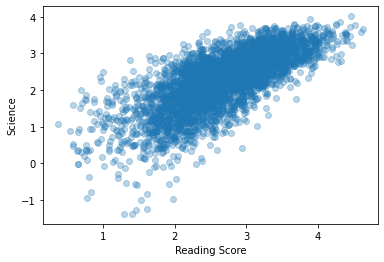

In [13]:
#Your code
plt.scatter(education_data.Reading_Score, education_data.Science_Score, alpha=.3)
plt.xlabel('Reading Score')
plt.ylabel('Science')
plt.show()


Your answer: The trend in the relationship is positive although before both scores reach 2, it is not a strong positive correlation as it is very scattered.

---

## Problem 7 (6 pts)

Measure the strength of the association observed in the scatterplot from the previous problem by calculating and printing the **covariance** and (Pearson) **correlation** between the reaching and science scores. Use the [`.cov()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cov.html) and [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) pandas Series methods.

Create two new Series:
* `reaching_times_ten` = the reaching score column times 10,
* `science_times_ten` = the science score column times 10.

Calculate and print the covariance and correlation between these two new series and describe the effect of scaling the original data by 10 on the covariance and correlation.

---

In [14]:
#Your code:
cov = "{:.2f}".format(education_data.Reading_Score.cov(education_data.Science_Score))
print('Covariance: ', cov)

corr = "{:.2f}".format(education_data.Reading_Score.corr(education_data.Science_Score))
print('Correlation: ', corr)

reaching_times_ten = education_data.Reading_Score * 10
science_times_ten = education_data.Science_Score * 10

tencov = "{:.2f}".format(reaching_times_ten.cov(science_times_ten))
print('Times Ten Covariance: ', tencov)

tencorr = "{:.2f}".format(reaching_times_ten.corr(science_times_ten))
print('Times Ten Correlation: ', tencorr)

Covariance:  0.35
Correlation:  0.73
Times Ten Covariance:  34.77
Times Ten Correlation:  0.73


Your answer: Scaling the data has no effect on the correlation because the relationship between the two variables stays the same. It caused the covariance to increase by a factor of 10^2, this makes sense because covariance is not a standardized value of the relationship measure and is changed by scaling the values of dataset.

---

## Problem 8 (6 pts)

Calculate and print the mean and standard deviation of the math and science scores. Save these values to Python variables.

Select the students whose **science score** is between its mean and one standard deviation above the mean. Calculate and print the mean and the standard deviation of the **math scores** for this subset of students.

For the math scores, how do the mean and standard deviation change when we go from looking at all students in the dataset to just those with a science score within one standard deviation above its mean? How does your observation relate to the correlation score between these two variables?

---

In [15]:
#Your code:
math_mean = education_data.Math_Score.mean()
math_std = education_data.Math_Score.std()
print('Math Mean: ', np.round(math_mean,2))
print('Math Standard Deviation: ', np.round(math_std,2))

science_mean = education_data.Science_Score.mean()
science_std = education_data.Science_Score.std()
print('Science Mean: ', np.round(science_mean,2))
print('Science Standard Deviation: ', np.round(science_std,2))

subset = education_data[education_data["Science_Score"].between(science_mean, science_mean + science_std)]

subset_mean = subset.Math_Score.mean()
subset_std = subset.Math_Score.std()
print('\n')
print('Subset Mean: ', np.around(subset_mean,2))
print('Subset Standard Deviation: ', np.around(subset_std,2))

Math Mean:  3.16
Math Standard Deviation:  0.73
Science Mean:  2.29
Science Standard Deviation:  0.75


Subset Mean:  3.42
Subset Standard Deviation:  0.49


Your answer: The subset mean increases when we just look at the subset of students within a standard deviation above the mean. This relates to the correlation because the correlation between these two variables is positive, indiciating that as science scores go up, math scores go up as well. The standard devation decreases because there is less variance in these variables around the mean -- the range of these scores around the mean decreases since we are looking at a smaller subset.

---

## Problem 9 (9 pts)

Group the data by school (indicated in the ID column `'S7_ID'`) and calculate the mean math and reaching scores for each school. Subset the data, keeping only school whose average math *and* reaching scores are both strictly greater than 2. Save this dataframe as a variable called `school_mean_subset`. Print the number of rows in `school_mean_subset`.

**Hint:** When subsetting the mean reaching and reaching scores by school to satisfy two  conditions, there are [several ways to accomplish this task](https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/). Pick your favorite. And [`.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) is a method you may need if you want to reset the index column of a groupby result.

**Confidence check:** You should have 911 schools whose math and reaching scores are both  strictly greater than 2.

Calculate and print the standard (Pearson) correlation and the rank (Spearman) correlation between the math and science scores in the subset data. The [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) computes the Pearson correlation by default, but you can get the Sperman correlation by explicitly specifying the `method` parameter (check the docs).

Make a scatterplot with the average math scores on the x-axis, and the average reaching scores on the y-axis. Discuss any patterns you see in the scatterplot, and connect your observations to the two correlation scores.

---

Number of Rows:  911
Pearson Correlation:  0.68
Standard Correlation:  0.69


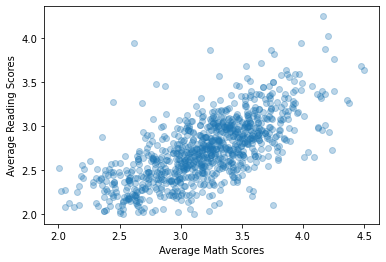

In [16]:
#Your code:
school_math_mean = education_data.groupby('S7_ID')['Math_Score'].mean()

school_reading_mean = education_data.groupby('S7_ID')['Reading_Score'].mean()

school_mean = pd.merge(school_math_mean, school_reading_mean, on='S7_ID')

school_mean_subset = school_mean.loc[(school_mean.Math_Score > 2) & (school_mean.Reading_Score >2)]

print('Number of Rows: ', school_mean_subset.Math_Score.count())

#CHECKS
#school_mean_subset.tail()

print('Pearson Correlation: ', round(school_mean_subset.Math_Score.corr(school_mean_subset.Reading_Score),2))
print('Standard Correlation: ',round(school_mean_subset.Math_Score.corr(school_mean_subset.Reading_Score, method='spearman'),2))

plt.scatter(school_mean_subset.Math_Score, school_mean_subset.Reading_Score, alpha=.3)
plt.xlabel('Average Math Scores')
plt.ylabel('Average Reading Scores')
plt.show()

Your answer: The scatterplot shows a mildly strong positive correlation that reflects the coreelation that we found. It is not extremely strong as it is somewhat random and scattered in small portions, but the overall trend is positive.

---

## Problem 10 (8 pts)

Use the [`.rank()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) Series method to add columns called `'math_rank'` and `'reaching_rank'` to `school_mean_subset`; these columns should contain the rank of the average math and reaching scores (by school), respectively. Print the first few rows of these new columns.

**Confidence check:** For the school with `S7_ID==1022`, the mean math score rank is 859 and the mean reaching score rank is 809.

Calculate the Pearson and Spearman correlation between the two rank variables and make a scatterplot with `math_rank` on the x-axis and `reaching_rank` on the y-axis.

Compare the correlations computed in this problem with those computed in the previous problem.

---

S7_ID
1002    634.0
1003    245.0
1006    169.0
1012     22.0
1013    624.0
Name: math_rank, dtype: float64
S7_ID
1002    729.0
1003    361.0
1006    271.0
1012    184.0
1013    403.0
Name: reading_rank, dtype: float64
Pearson Correlation:  0.69
Standard Correlation:  0.69


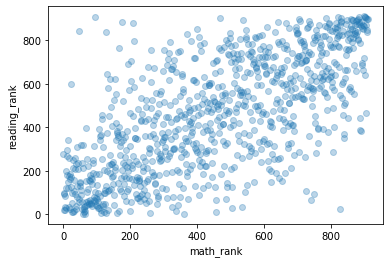

In [17]:
#Your code:
school_mean_subset= school_mean_subset.copy()

school_mean_subset['math_rank'] = school_mean_subset.Math_Score.rank()
school_mean_subset['reading_rank'] = school_mean_subset.Reading_Score.rank()

print(school_mean_subset.math_rank.head())
print(school_mean_subset.reading_rank.head())

#CHECK
#print(school_mean_subset.loc[1022])

print('Pearson Correlation: ', round(school_mean_subset.math_rank.corr(school_mean_subset.reading_rank),2))
print('Standard Correlation: ',round(school_mean_subset.math_rank.corr(school_mean_subset.reading_rank, method='spearman'),2))

plt.scatter(school_mean_subset.math_rank, school_mean_subset.reading_rank, alpha=.3)
plt.xlabel('math_rank')
plt.ylabel('reading_rank')
plt.show()


Your answer: While the Pearson correlation stayed the same, the standard correlation increased by .1. This makes sense because the Spearman correlation measures how much variables tend to change together which in the case of the rank, doesn't differ from the actual mean. In the case of the Pearson correlation, there is a stronger relationship between the rank of the two subjects compared to just the mean because the proportional change is stronger.

---

## Problem 11 (8 pts) 

`PARENTINV` represents whether or not parents attend school events. Calucate the mean score of math,science,reaching score,then compare the difference between scores according the `PARENTINV`. Make a boxplot with the average scores on the y-axis, and the `PARENTINV`  on the x-axis. Discuss any patterns you see in the boxplot.

[A **t-test** is a statistical test that is used to compare the means of two groups](https://www.statisticshowto.com/probability-and-statistics/t-test/). The t test tells you how **significant** the differences between groups are. It has been used widely in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. Every t-value has a **p-value** to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. **Low p-values are good**; They indicate your data did not occur by chance. Now we perform the math score for parent event that is above 3 and below 3. Explain your result.

---


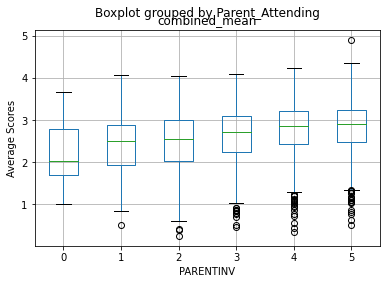

In [18]:
#Your code:

education_data['combined_mean'] = (education_data[['Math_Score','Science_Score','Reading_Score']].mean(axis=1))

#print(education_data.combined_mean)

education_data.boxplot(column='combined_mean', by='Parent_Attending')
plt.xlabel('PARENTINV')
plt.ylabel('Average Scores')
plt.show()

In [21]:
#T-test code:
below_three = education_data[education_data.Parent_Attending>=3].Math_Score
above_three = education_data[education_data.Parent_Attending<3].Math_Score
t_val, p_val = stats.ttest_ind(below_three,above_three)
print("t = " +str(t_val))
print("p = " + str(p_val))

t = 11.162581950253115
p = 1.4545621449521393e-28


In the graph of the boxplots, we see that on average, average scores increase as parent involvement increases. The only caveat to this is in between 1 and 2 values of PARENTINV, the minimums for average scores of 2 are lower than the minimums for average scores of 1. Despite this, there is a general positive trend between the two varaibles.

The t-test and p-test scores show us that this trend is unlikely to have just happened by chance. There is enough significant different between the two data sets (below three and above three) to show us that there is a significant effect of parrent involvement on test scores, namely that increased parent involvement conveys increases test scores. 